# **TO DO FIRST**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

https://github.com/bchao1/Anime-Face-Dataset/

https://www.kaggle.com/tunguz/70000-real-faces-1

# ***Downloading and Extracting Data***

https://www.kaggle.com/sanyam1992000/anime-faces-vs-human-faces

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [33]:
!kaggle datasets download -d sanyam1992000/self-face-recognition1

self-face-recognition1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!unzip "*.zip"

Archive:  self-face-recognition1.zip
replace human/00000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: human/00000.png         
  inflating: human/00001.png         
  inflating: human/00002.png         
  inflating: human/00003.png         
  inflating: human/00004.png         
  inflating: human/00005.png         
  inflating: human/00006.png         
  inflating: human/00007.png         
  inflating: human/00008.png         
  inflating: human/00009.png         
  inflating: human/00010.png         
  inflating: human/00011.png         
  inflating: human/00012.png         
  inflating: human/00013.png         
  inflating: human/00014.png         
  inflating: human/00015.png         
  inflating: human/00016.png         
  inflating: human/00017.png         
  inflating: human/00018.png         
  inflating: human/00019.png         
  inflating: human/00020.png         
  inflating: human/00021.png         
  inflating: human/00022.png         
  inflating: human/00023

In [35]:
path = ''
classes = ['sanyam', 'human']

In [36]:
for c in classes:
    print(c)
    verify_images(c, delete=True, max_size=3000)

sanyam


human


# ***Data Augmentation***

***Applying Jitter***

In [25]:
def apply_jitter(folder, name):
  image = open_image(folder + '/' + name)
  img_counter = folder + '/' + 'jitter' + str(name.split('.')[0])
  idx = 0
  for magnitude in np.linspace(-0.05,0.05,2):
    image.jitter(magnitude)
    dest = str(img_counter)+ str(idx) +".jpg"
    image.save(dest)
    idx += 1


***Applying Dihedral***

In [26]:
def apply_dihedral1(image, folder, name):
  img_counter = folder + '/' + 'dihedral' + str(name.split('.')[0])
  idx = 0
  for i in range(1,5,3):
    new_img = dihedral(image, i)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1



***Changing Brightness***

In [27]:
def change_brightness(image, folder, name):
  img_counter = folder + '/' + 'brightness' + str(name.split('.')[0])
  idx = 0
  for change in np.linspace(0.2,0.8,2):
    new_img = brightness(image, change)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

***Changing Contrast***

In [28]:
def change_contrast(image, folder, name):
  img_counter = folder + '/' + 'contrast' + str(name.split('.')[0])
  idx = 0
  for scale in np.exp(np.linspace(log(0.5),log(2),2)):
    new_img = contrast(image, scale)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

***Fliping Horizontally***

In [29]:
def flip_horizontally(image, folder, name):
  img_counter = folder + '/' + 'contrast' + str(name.split('.')[0])
  idx = 0
  new_img = flip_lr(image)
  dest = str(img_counter)+ str(idx) +".jpg"
  new_img.save(dest)
  idx += 1

***Common function to apply all filters***

In [30]:
def data_augmentation(images):
  for img in images[:250]:
    apply_jitter(path + '/' + c , img)
      
  print("done 0")

  for img in images[250:500]:
    change_brightness(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

  print("done 1")

  for img in images[500:750]:
    apply_dihedral1(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

  print("done 2")

  for img in images[750:1000]:
    change_contrast(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

  print("done 3")

  for img in images[1000:1250]:
    flip_horizontally(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

In [32]:
classes = ['sanyam', 'human']

for c in classes:
  images = os.listdir(c)
  print(c)
  print(len(images))

  data_augmentation(images) 

sanyam
1003


FileNotFoundError: ignored

***Checking number of images after Data Augmentation***

In [8]:
path = ''
classes = ['sanyam', 'human']

for c in classes:
    images = os.listdir(c)
    print(c)
    print(len(images))

sanyam
1003
human
3000


# ***Training***




***Keeping Random values same***

In [9]:
np.random.seed(2)

In [10]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

***Showing 64 random images from dataset***

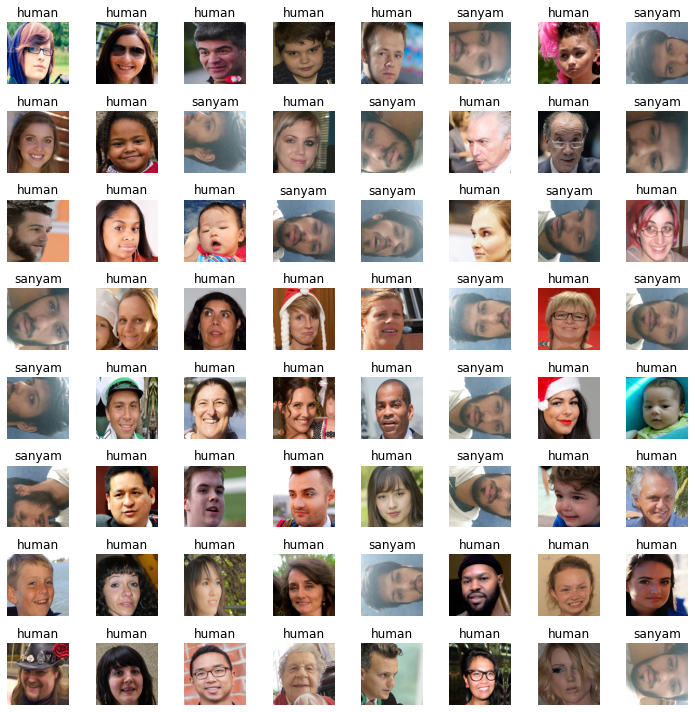

In [11]:
data.show_batch(rows=10, figsize=(10,10))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['human', 'sanyam'], 2, 3203, 800)

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
# help(cnn_learner)
# doc(cnn_learner)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [14]:
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.LOAD_TRUNCATED_IMAGES = True

***Training***

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.072927,0.000077,1.000000,03:55
1,0.021595,0.000305,1.000000,03:48
2,0.008633,0.000055,1.000000,03:47
3,0.006963,0.000083,1.000000,03:46


***Exporting model***

In [16]:
os.makedirs("/content/drive/My Drive/dl_projects/self-face-recognition",exist_ok=True)
dir = "/content/drive/My Drive/dl_projects/self-face-recognition"

In [17]:
learn.save(dir+"/Stage-1")

In [18]:
dir = "/content/drive/My Drive/dl_projects/self-face-recognition"

learn.load(dir + "/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (3203 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sanyam,sanyam,sanyam,sanyam,sanyam
Path: /content;

Valid: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
human,sanyam,human,human,human
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [19]:
learn.export(dir+"/export.pkl")

***Uploading export.pkl***

In [20]:
dir = "/content/drive/My Drive/dl_projects/self-face-recognition"
!pip install -U kora
from kora.drive import upload_public
url = upload_public(dir+"/export.pkl")
url

'https://drive.google.com/uc?id=1ClgymY8DecZFlrDRX6q9aoWkgH63dpqX'

# ***Results***

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

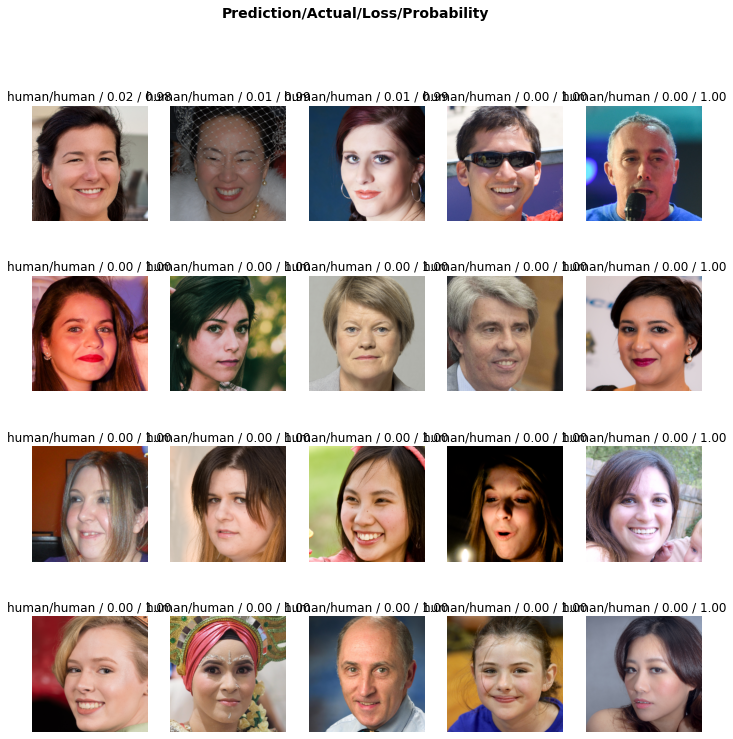

In [22]:
interp.plot_top_losses(20, figsize=(12,12))

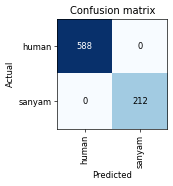

In [23]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[]